### Input: CIF File

Characterize the asymmetry of the Na2Ti2Si2O9 system

In [1]:
from pymatgen.analysis.local_env import CrystalNN
from pymatgen.core import Structure
from tabulate import tabulate
from IPython.display import HTML

import matplotlib.pyplot as plt

import numpy as np

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fancybox'] = True

In [2]:
cif = "Na2Ti2Si2O9.cif"

# load structure file
structure = Structure.from_file(cif)
print(structure)

Full Formula (Na8 Ti8 Si8 O36)
Reduced Formula: Na2Ti2Si2O9
abc   :   8.797689   5.287007  14.734708
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (60)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  Na+   0.063313  0.359405  0.345657
  1  Na+   0.936687  0.640595  0.654343
  2  Na+   0.436687  0.140595  0.845657
  3  Na+   0.563313  0.859405  0.154343
  4  Na+   0.563313  0.140595  0.654343
  5  Na+   0.436687  0.859405  0.345657
  6  Na+   0.936687  0.359405  0.154343
  7  Na+   0.063313  0.640595  0.845657
  8  Ti4+  0.150354  0.130192  0.668913
  9  Ti4+  0.849646  0.869808  0.331087
 10  Ti4+  0.349646  0.369808  0.168913
 11  Ti4+  0.650354  0.630192  0.831087
 12  Ti4+  0.650354  0.369808  0.331087
 13  Ti4+  0.349646  0.630192  0.668913
 14  Ti4+  0.849646  0.130192  0.831087
 15  Ti4+  0.150354  0.869808  0.168913
 16  Si4+  0.158025  0.199803  0.973482
 17  Si4+  0.841975  0.800197  0.026518
 18  S

Neighbors of atom at site 8, Ti4+
[ 1.61248443  2.32904818 10.63857705] O2-
[6.86549073e-18 4.26925815e-02 1.10510310e+01] O2-
[ 2.78636007 -0.31445532 10.63857705] O2-
[0.05445769 1.27202745 8.45663202] O2-
[ 1.45332544 -1.06297919  8.60392016] O2-
[2.94551906 1.58052431 8.60392016] O2-

Average bond direction in abc coords (normalized):
[0.740812 0.38117  0.553089]



Bond Angles (deg.),Count
76.5907,1
76.6243,1
82.3869,1
83.3679,1
87.2067,1
87.4129,1
95.5236,1
95.6874,1
97.5638,1
97.973,1


Bond Lengths (Angstroms),Count
1.84064,1
1.89581,1
1.939,1
1.97692,1
2.15695,1
2.23554,1


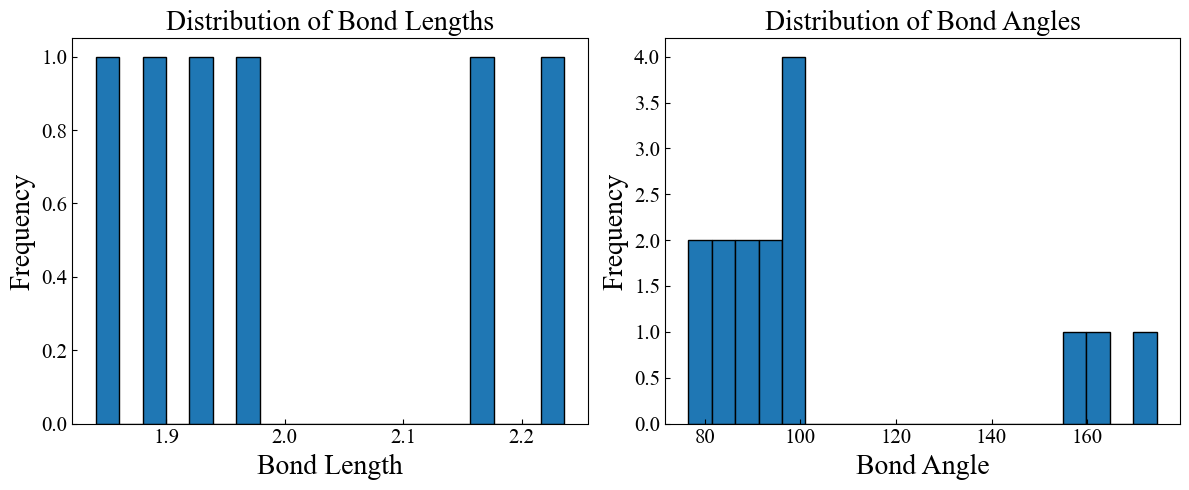

In [3]:
# Create a CrystalNN object for finding neighbors
nn = CrystalNN(distance_cutoffs = None)

bond_lengths = []
bond_angles = []
neighbor_vectors = []

site_index = 8 # atom index in structure
c_atom = structure[site_index] # Central atom

neighbors = nn.get_nn(structure, site_index)
neighbor_types = set()
print(f"Neighbors of atom at site {site_index}, {structure.species[site_index]}")
for neighbor in neighbors:
    print(neighbor)
    neighbor_types.add(neighbor.specie)

if len(neighbor_types) > 1:
    print("\nWARNING: Multiple types of neighbors detected!")
    print("Anisotropy will depend on more than just geometry!")


def angle_between_vecs(v1, v2):
    v1 = v1/np.linalg.norm(v1)
    v2 = v2/np.linalg.norm(v2)
    angle = np.arccos(np.round(np.dot(v1, v2),6))/np.pi*180.0
    return angle

unique_comparisons = []
for atom1 in neighbors:
    for atom2 in neighbors:
        if (atom1, atom2) in unique_comparisons or (atom2, atom1) in unique_comparisons:
            pass
        elif not (atom1 == atom2):
            v1 = (c_atom.coords-atom1.coords)/np.linalg.norm(c_atom.coords-atom1.coords)
            v2 = (c_atom.coords-atom2.coords)/np.linalg.norm(c_atom.coords-atom2.coords)
            angle = angle_between_vecs(v1, v2)
            bond_angles.append(np.round(angle,6))
            
            unique_comparisons.append((atom1, atom2))
    
    bond_lengths.append(np.round(np.linalg.norm(atom1.coords - c_atom.coords),6))
    neighbor_vectors.append(np.round(atom1.frac_coords - c_atom.frac_coords,6))

avg_bnd_direction_abc = np.round(np.mean(neighbor_vectors,axis=0), 6)
avg_bnd_direction_abc = np.abs(avg_bnd_direction_abc) # necessary for visualization
avg_bnd_direction_abc = np.round(avg_bnd_direction_abc / np.linalg.norm(avg_bnd_direction_abc), 6)

# Display average bond direction
print("\nAverage bond direction in abc coords (normalized):")
print(avg_bnd_direction_abc)



"""
Data Tables
- Bond Lengths in angstroms
- Bond Angles (with respect to central atom) in degrees
"""

print()
# Prepare data for bond angles table
angle_data = [["Bond Angles (deg.)", "Count"]]
unique_angles = set(bond_angles)
angle_counts = [(angle, bond_angles.count(angle)) for angle in unique_angles]
angle_counts.sort(key=lambda x: x[0])  # Sort by bond angle (first element of each tuple)
for angle, count in angle_counts:
    angle_data.append([angle, count])

# Display bond angles table
angle_table = tabulate(angle_data, headers="firstrow", tablefmt="html")
angle_table_scrollable = f"<div style='height:150px; overflow:auto;'>{angle_table}</div>"
angle_table_html = HTML(angle_table_scrollable)
display(angle_table_html)

# Prepare data for bond lengths table
length_data = [["Bond Lengths (Angstroms)", "Count"]]
unique_lengths = set(bond_lengths)
length_counts = [(length, bond_lengths.count(length)) for length in unique_lengths]

length_counts.sort(key=lambda x: x[0])  # Sort by bond angle (first element of each tuple)
for length, count in length_counts:
    length_data.append([length, count])

# Display bond lengths table
length_table = tabulate(length_data, headers="firstrow", tablefmt="html")
length_table_scrollable = f"<div style='height:150px; overflow:auto;'>{length_table}</div>"
length_table_html = HTML(length_table_scrollable)
display(length_table_html)



"""
Bond Length and Bond Angle Distribution Plots
"""

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the distribution of bond lengths
ax1.hist(bond_lengths, bins=20, edgecolor='black')
ax1.set_xlabel('Bond Length')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Bond Lengths', fontsize = 20)

# Plot the distribution of bond angles
ax2.hist(bond_angles, bins=20, edgecolor='black')
ax2.set_xlabel('Bond Angle')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Bond Angles', fontsize = 20)

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

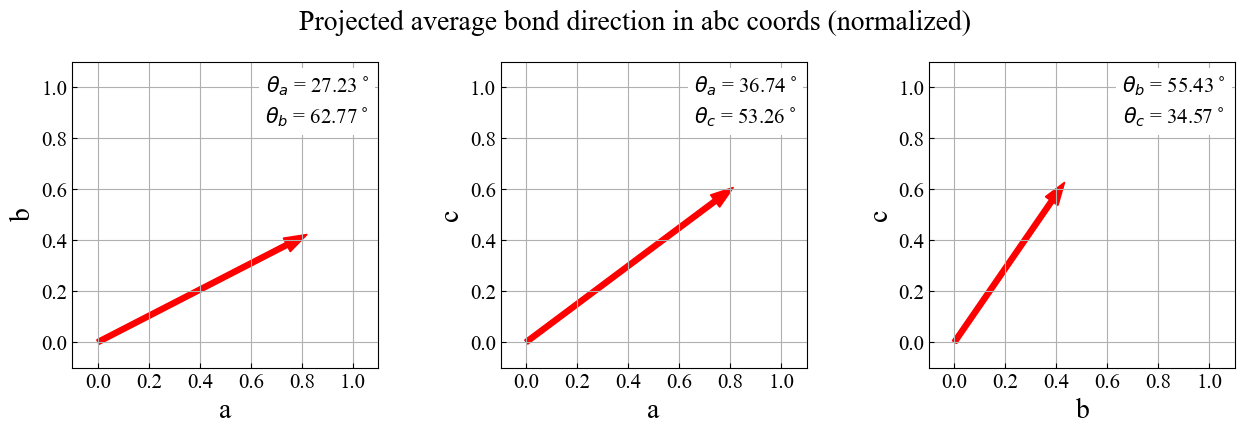

In [8]:
# Create a figure with three subplots, one for each projection
fig, axs = plt.subplots(1, 3, figsize=(15, 4.5))

arrow_width = 0.02
projections = [['a','b'], ['a','c'], ['b','c']]
bbox_props = dict(boxstyle='square', facecolor='white', edgecolor='none')

# Plot vector projection onto each subplot
for i, ax in enumerate(axs):
    if i == 0:
        arrow_vec = np.asarray([avg_bnd_direction_abc[0], avg_bnd_direction_abc[1]])
        
    elif i == 1:
        arrow_vec = np.asarray([avg_bnd_direction_abc[0], avg_bnd_direction_abc[2]])

    else:
        arrow_vec = np.asarray([avg_bnd_direction_abc[1], avg_bnd_direction_abc[2]])

    
    # Plot the array
    bond_arrow = ax.arrow(0, 0, arrow_vec[0], arrow_vec[1], color='red', 
                          width=arrow_width, label='avg_bnd_direction_abc')

    # Set axes labels
    ax.set_xlabel(projections[i][0])
    ax.set_ylabel(projections[i][1])

    # Calculate the angles between the vector and x and y axes
    x_angle = np.degrees(np.arctan2(arrow_vec[1], arrow_vec[0]))
    y_angle = np.degrees(np.arctan2(arrow_vec[0], arrow_vec[1]))

    # Include the angles as labels in each subplot
    ax.text(0.8, 0.9, fr"$\theta_{projections[i][0]}$ = {x_angle:.2f}$^\circ$", 
            transform=ax.transAxes, ha='center', bbox=bbox_props, fontsize = 15)
    ax.text(0.8, 0.8, fr"$\theta_{projections[i][1]}$ = {y_angle:.2f}$^\circ$", 
            transform=ax.transAxes, ha='center', bbox=bbox_props, fontsize = 15)

    # Set the limits of each axis
    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([-0.1, 1.1])

    # Set the ticks of each axis
    ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

    ax.grid(True)
    ax.set_aspect('equal')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)

fig.suptitle(r"Projected average bond direction in abc coords (normalized)", fontsize = 20, y=0.95)

# Show the figure
plt.show()